In [81]:
import numpy as np
from sklearn.datasets import make_classification, make_blobs
from mlxtend.plotting import plot_decision_regions
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_pipeline_classes.helper import visualize_tree
from sklearn.model_selection import train_test_split 

from graphviz import Source
from IPython.display import SVG

from sklearn.tree import export_graphviz
#graph = Source(export_graphviz(tree1, out_file=None, feature_names=df[['x1', 'x2']].columns,  filled=True, rounded=True))
#SVG(graph.pipe(format='svg'))
%matplotlib inline

In [82]:
data = make_classification(n_samples=500, n_features=2, n_redundant=0, class_sep=0.6,
                           random_state=10)
#data = make_blobs(n_samples=500, random_state=42, cluster_std=4)

df = pd.DataFrame(data[0], columns=['x1', 'x2'])
df['label'] = data[1] 

In [100]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
X, y = data[0], data[1]

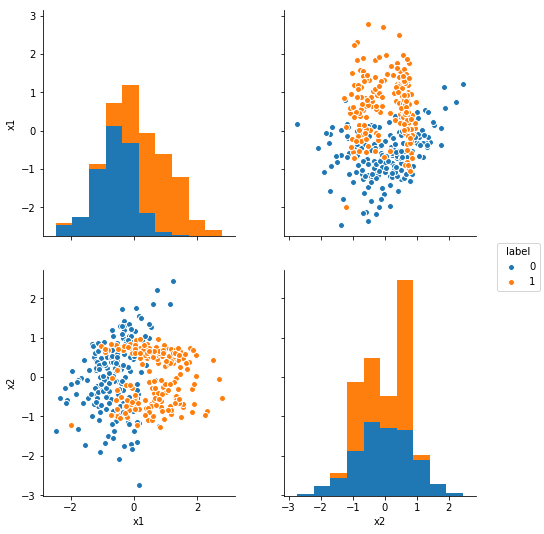

In [101]:
#fig, ax = plt.subplots(figsize=(10,10))
#fig.set_size_inches(12,10)
g = sns.pairplot(df_train, hue='label', vars=['x1', 'x2'])
g.fig.set_size_inches(8,8)

## Gini Index
- measure of total variance across the K classes
- $\hat{p}_{mk}$ proportion of training obvervations in the m-th region that are from the k-th class

$$ G = \sum_k \hat{p}_{mk} (1 - \hat{p}_{mk})$$

- Binary Classification:

$$G = \hat{p}_{m} (1-\hat{p}_m) + \hat{q}_m (1-\hat{q}_m) = 2 \hat{p}_m (1-\hat{p}_m)$$

- $$\hat{p}_{mk} = \frac{1}{N_m} \sum_{x_i \in R_m} I(y_i = k)$$
- in our example the two classes are balanced and we have one region at the beginning -> $\hat{p}_{0} = 0.5$
- Hence the gini index is $G = 0.5$

In [102]:
def binaryGini(p):
    return 2*p*(1-p)

def binaryCrossEntropy(p):
    return -2*p*np.log(p)

In [103]:
p = np.arange(0.05,1.05, 0.05)
p

array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])

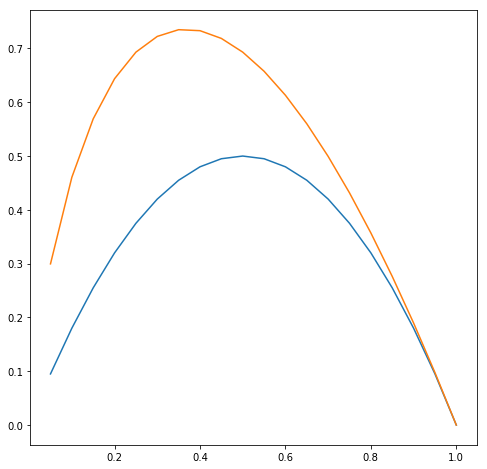

In [104]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(p,binaryGini(p))
ax.plot(p,binaryCrossEntropy(p))

## Cross Entropy
- measures performance of a binary classifier
- $$ E = \sum_k \hat{p}_{mk} \ln \hat{p}_{mk}$$

### let's train a tree

In [105]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [108]:
def trainTree(depth):
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(df_train[['x1', 'x2']], df_train['label'])
    splits = []
    for element in dtree.tree_.__getstate__()['nodes']:
        if element[0] >=0:
            splits.append((element[2], element[3]))
    graph = Source(export_graphviz(dtree, out_file=None, feature_names=df[['x1', 'x2']].columns,  filled=True, rounded=True))
    X,y = df[['x1', 'x2']].as_matrix(), df['label'].as_matrix()
    fig, ax = plt.subplots()
    visualize_tree(dtree, X, y, ax=ax, cmap='coolwarm')
    #decision = plot_decision_regions(df[['x1', 'x2']].as_matrix(), df['label'].as_matrix(), dtree, hide_spines=False)
    #for element in splits:
    #    if element[0] == 1:
    #        plt.axhline(element[1])
    #    else:
    #        plt.axvline(element[1])
    treeplot = SVG(graph.pipe(format='svg'))
    return treeplot

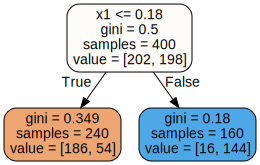

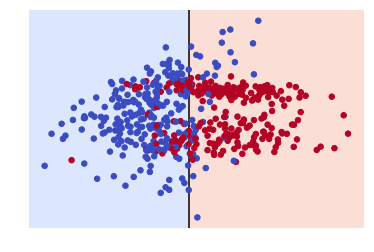

In [109]:
trainTree(1)

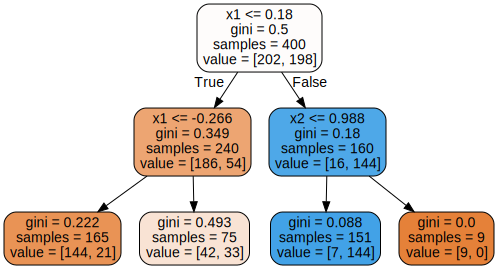

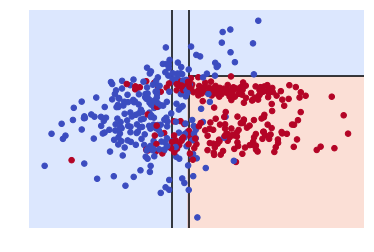

In [110]:
trainTree(2)

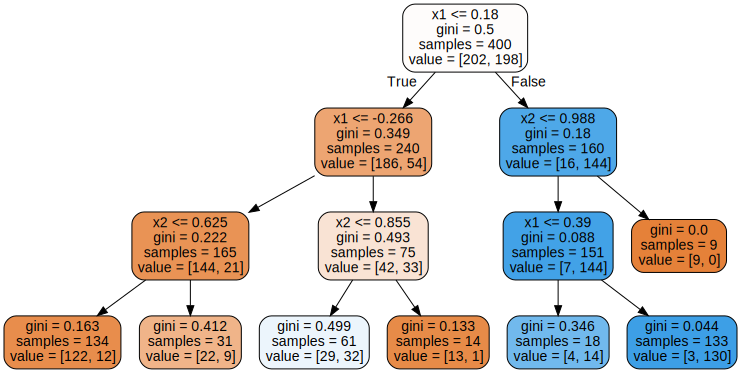

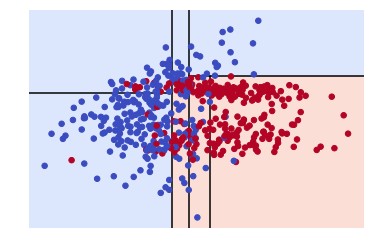

In [111]:
trainTree(3)

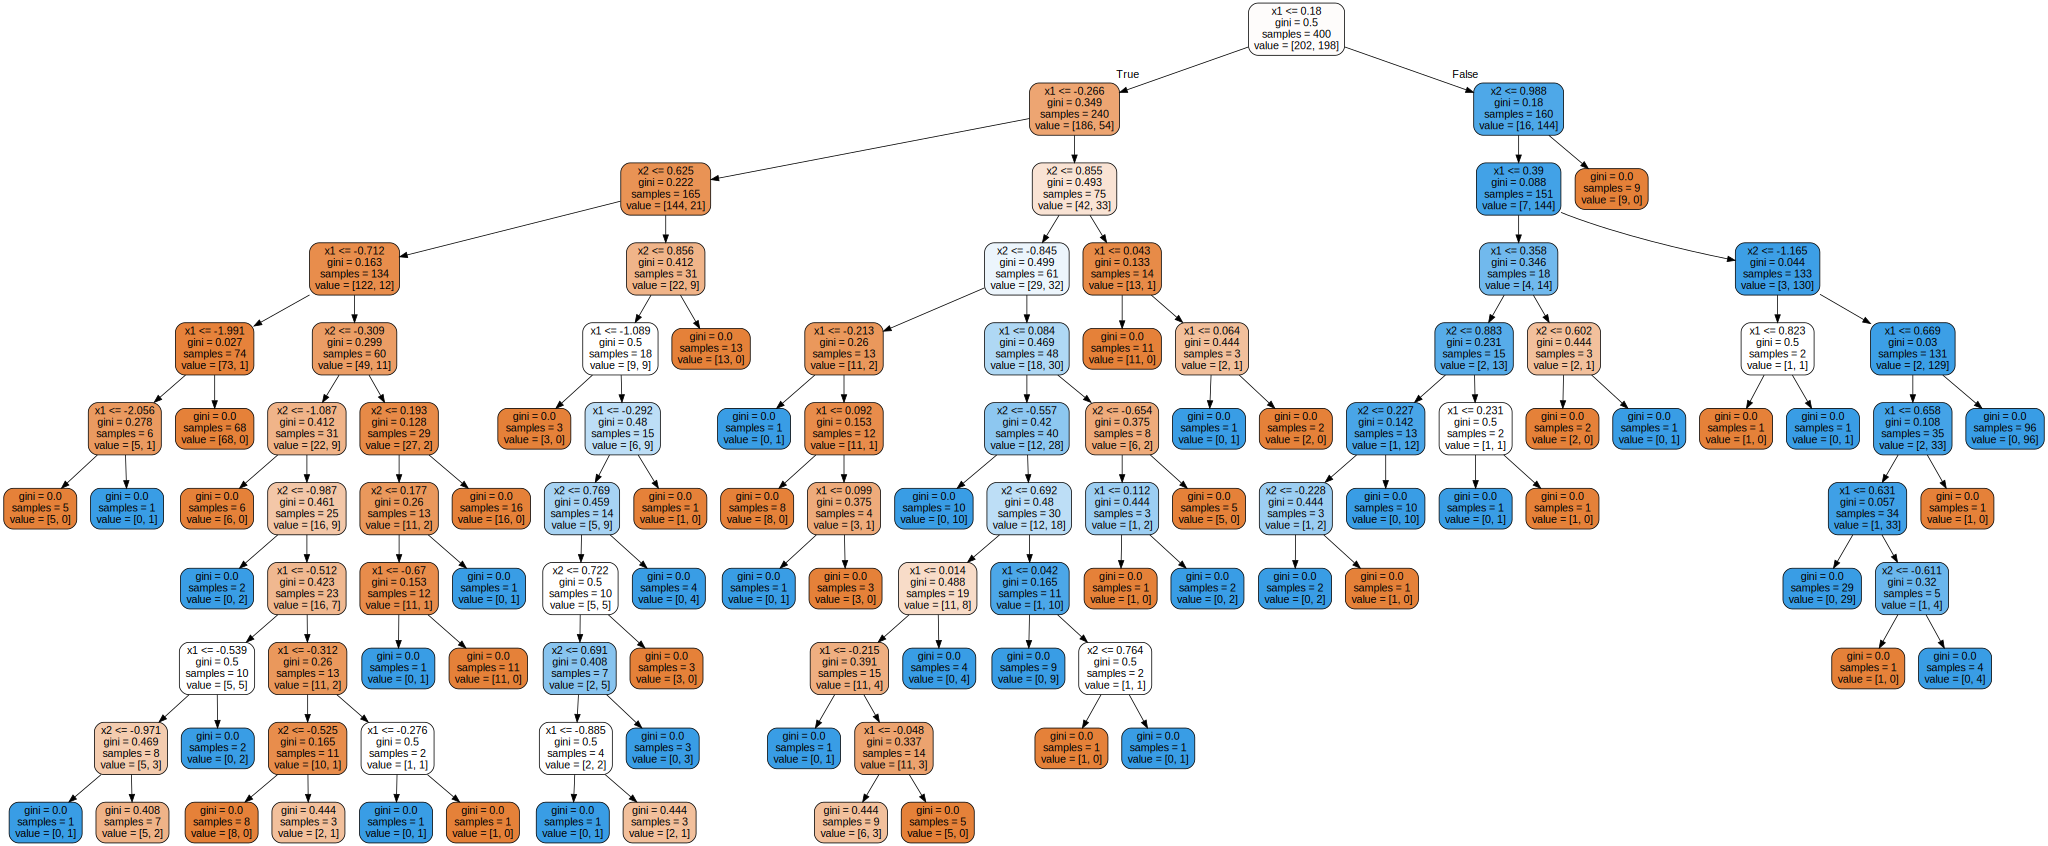

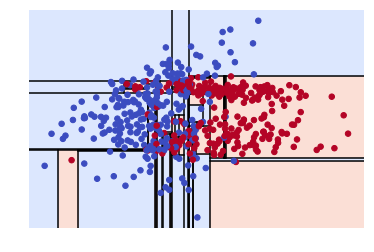

In [112]:
trainTree(10)

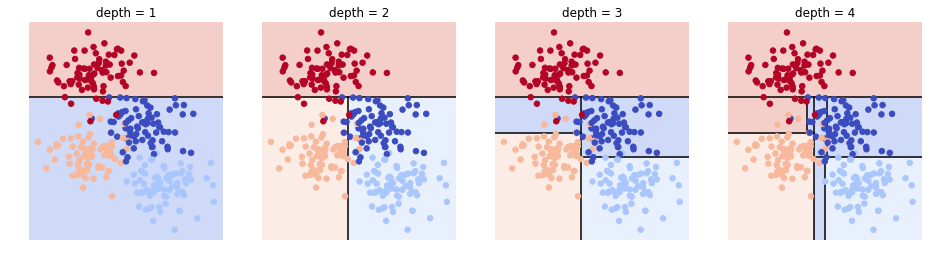

In [48]:
from sklearn.datasets import make_blobs
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
#fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi, cmap='coolwarm')
    axi.set_title('depth = {0}'.format(depth))

#fig.savefig('figures/05.08-decision-tree-levels.png')